# PA 2: Classification - Decision Tree

## --> Student Details [3 Points]

Notes: When submitting, fill your name and ID in this cell.  [1 point]

Prem Atul Jethwa - 1001861810 <br>
Lavanya Srinivasan - 1002040671 <br>
Shubham Sharma - 1001964524



## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.

#### <b>Note: Please consult the TA before using libraries other than the ones mentioned above</b>

### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

## Programming Assignment Submission Instructions [2 Points]

### Each file should be submitted separately, do not compress them

For Decision Tree:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report/Explanation in markdown cells and code in code cells of Notebook preferred)

# Begin your code from here

In [1]:
# Begin here
# Importing the required packages/ libraries

import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import os

In [2]:
# Import the libraries and load the dataset (from the csv file) [5 points]

df = pd.read_csv('dataset_DT.csv')
df.head()


age          job   marital  education default  balance housing loan  \
0  34.0  blue-collar    single  secondary      no  13408.0      no   no   
1  49.0   management  divorced   tertiary      no  20727.0      no   no   
2  32.0     services    single   tertiary      no   1743.0     yes   no   
3  46.0   management  divorced   tertiary      no  10469.0     yes   no   
4  26.0   management    single   tertiary      no   7628.0      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  1.0   apr     647.0       2.0   -1.0       0.0  unknown  no  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
3  cellular  1.0   apr     202.0       2.0   -1.0       0.0  unknown  no  
4  cellular  1.0   apr     263.0       1.0   -1.0       0.0  unknown  no

In [3]:
df.tail()


age           job  marital  education default  balance housing loan  \
18418  41.0    technician  married  secondary      no   2152.0      no   no   
18419  57.0    management  married    unknown      no      0.0      no   no   
18420  40.0   blue-collar  married  secondary      no   1451.0      no   no   
18421  38.0    technician   single  secondary      no   1711.0      no   no   
18422  84.0  entrepreneur  married  secondary      no      0.0      no   no   

         contact   day month  duration  campaign  pdays  previous poutcome  \
18418   cellular  30.0   sep     134.0       1.0  121.0       1.0    other   
18419   cellular  30.0   sep     585.0       1.0   -1.0       0.0  unknown   
18420   cellular  30.0   sep     117.0       1.0  121.0       1.0  success   
18421  telephone  30.0   sep     234.0       1.0   -1.0       0.0  unknown   
18422  telephone  30.0   sep     992.0       2.0   -1.0       0.0  unknown   

         y  
18418   no  
18419   no  
18420  yes  
18421  yes  
18422  yes

In [4]:
# Data Pre-processing
# Pre-process the dataset and provide a detailed explanation. [25 points]

# The df.info() method is used in Python's pandas library to get a concise 
# summary of a DataFrame. This method prints information about the DataFrame, 
# including the data types of each column, the number of non-null values in 
# each column, and the memory usage of the DataFrame.

# load your dataset into a pandas DataFrame object
df_New = pd.read_csv('dataset_DT.csv')
df_New.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [5]:
# Data Pre-processing

categorical_features=[col for col in df.select_dtypes(include='object').columns if (col not in ['subscribed'])]
print(categorical_features)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


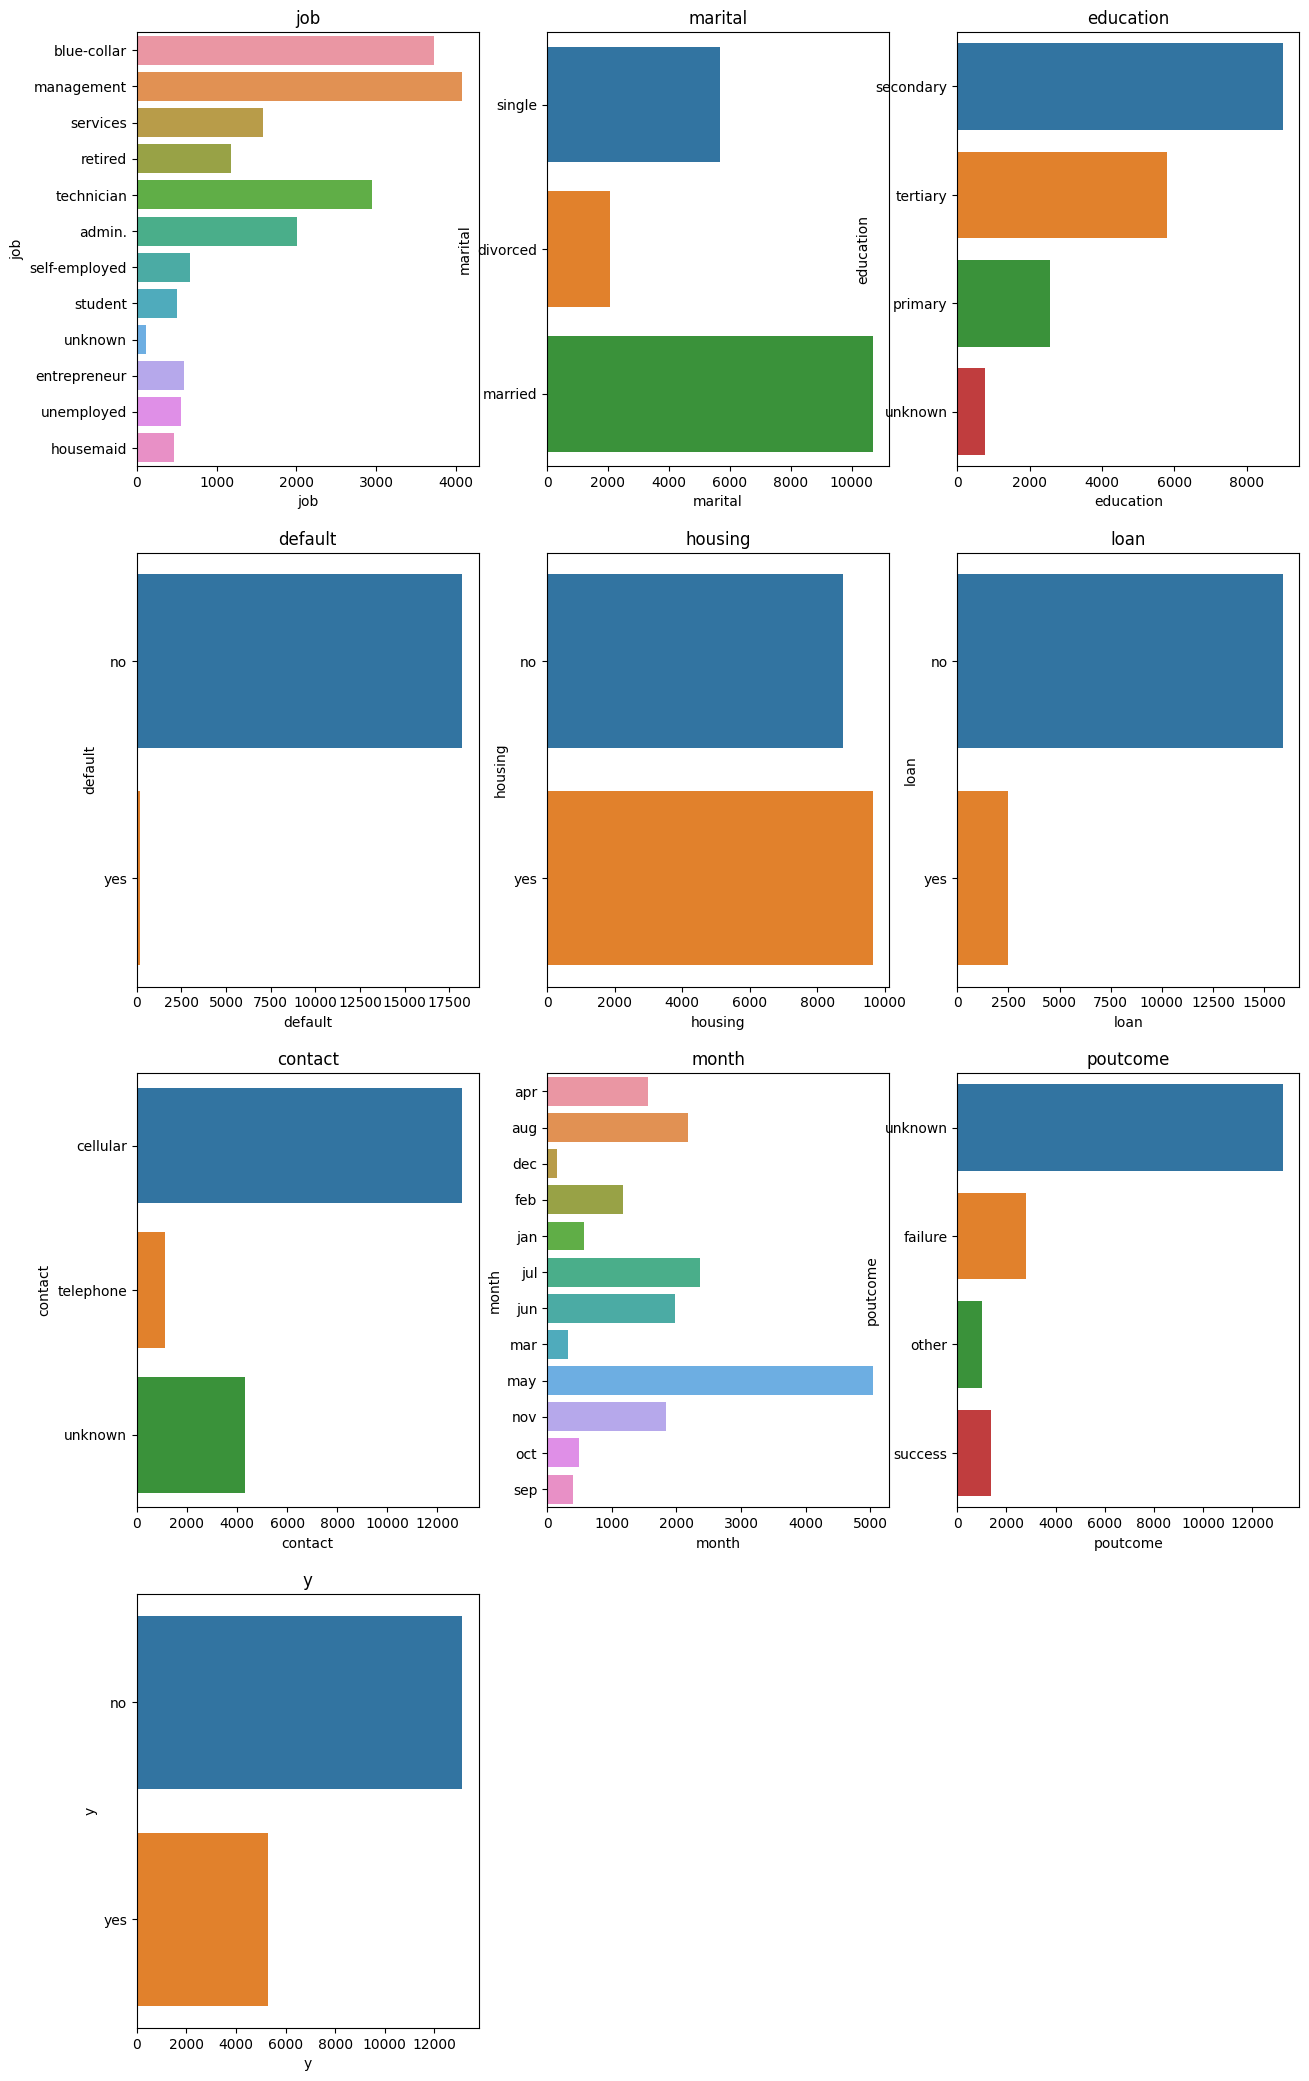

In [6]:
# Data Pre-processing
# Univariate analysis on all Categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show() 

In [7]:
# Data Pre-processing
# Assuming you have loaded your dataset into a pandas DataFrame object, 
# you can replace all the occurrences of the string "unknown" with the 
# pandas null value (NaN) in multiple columns using the following code:

import pandas as pd
import numpy as np

# create a list of column names where you want to replace "unknown" with NaN
columns_to_replace = ['job', 'education', 'contact', 'poutcome']

# replace "unknown" with NaN in the specified columns
df_New[columns_to_replace] = df_New[columns_to_replace].replace('unknown', pd.np.nan)

# New dataset with "unknown = null"
df_New.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18311 non-null  object 
 2   marital    18423 non-null  object 
 3   education  17350 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    14110 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   5164 non-null   object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


/var/folders/vb/yj04cknd6l923rznn78hlgm00000gp/T/ipykernel_7818/13191082.py:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_New[columns_to_replace] = df_New[columns_to_replace].replace('unknown', pd.np.nan)


In [8]:
# Data Pre-processing
# Printing the unique values for each column
# To print the unique values for each column in a Pandas DataFrame, you can 
# use a for loop to iterate over each column and use the unique() method to 
# get the unique values.

for i in range(df_New.shape[1]):
    print("\nUnique values of column " + df_New.columns[i] + " are as follows:", df_New[df_New.columns[i]].drop_duplicates().values)



Unique values of column age are as follows: [34. 49. 32. 46. 26. 54. 37. 33. 44. 39. 35. 52. 61. 41. 38. 27. 63. 19.
 50. 84. 86. 45. 60. 53. 36. 40. 57. 30. 47. 48. 58. 56. 42. 43. 24. 51.
 55. 29. 59. 80. 31. 77. 25. 65. 67. 21. 23. 78. 68. 20. 28. 73. 71. 69.
 62. 70. 66. 22. 76. 75. 74. 64. 95. 72. 85. 93. 82. 79. 18. 83. 81. 89.
 90. 87. 92. 94. 88.]

Unique values of column job are as follows: ['blue-collar' 'management' 'services' 'retired' 'technician' 'admin.'
 'self-employed' 'student' nan 'entrepreneur' 'unemployed' 'housemaid']

Unique values of column marital are as follows: ['single' 'divorced' 'married']

Unique values of column education are as follows: ['secondary' 'tertiary' 'primary' nan]

Unique values of column default are as follows: ['no' 'yes']

Unique values of column balance are as follows: [13408. 20727.  1743. ...  2601.  4545.  4416.]

Unique values of column housing are as follows: ['no' 'yes']

Unique values of column loan are as follows: ['no' 'yes']

U

In [9]:
# Data Pre-processing
# Count the number of null entries in each columns
# isnull() is a method in the Pandas library of Python that is used to check
# for missing or null values in a DataFrame. It returns a DataFrame or Series 
# of the same shape as the input data, but with boolean values indicating 
# which elements are missing or null.

df_New.isnull().sum()


age              0
job            112
marital          0
education     1073
default          0
balance          0
housing          0
loan             0
contact       4313
day            306
month          314
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64

In [10]:
# Data Pre-processing
# We can see that the 'contact' and 'poutcome' have maximum number of null values
# and thus are removed from the data set
# The drop() method takes one or more arguments that specify the labels of 
# the columns or rows to be removed. By default, the method removes the 
# specified columns. If you want to remove rows instead, you can use the 
# axis parameter and set its value to 0.

df_New = df_New.drop(['contact', 'poutcome'], axis = 1)

df_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18311 non-null  object 
 2   marital    18423 non-null  object 
 3   education  17350 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   day        18117 non-null  float64
 9   month      18109 non-null  object 
 10  duration   18423 non-null  float64
 11  campaign   18423 non-null  float64
 12  pdays      18423 non-null  float64
 13  previous   18423 non-null  float64
 14  y          18423 non-null  object 
dtypes: float64(7), object(8)
memory usage: 2.1+ MB


In [11]:
# Data Pre-processing
# Dropping unnecessary non-discrete or categorical data
# 98% of the clients in the dataset have no default credit.

df_New = df_New.drop(['default', 'balance'], axis = 1)

df_New.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18311 non-null  object 
 2   marital    18423 non-null  object 
 3   education  17350 non-null  object 
 4   housing    18423 non-null  object 
 5   loan       18423 non-null  object 
 6   day        18117 non-null  float64
 7   month      18109 non-null  object 
 8   duration   18423 non-null  float64
 9   campaign   18423 non-null  float64
 10  pdays      18423 non-null  float64
 11  previous   18423 non-null  float64
 12  y          18423 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.8+ MB


In [13]:
# Data Pre-processing
# Converting the string values in the dataset to numerical data

df_New.month = df_New.month.replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df_New.education = df_New.education.replace({'primary': 1, 'secondary': 2, 'tertiary': 3, 'unknown': 4})
df_New.housing = df_New.housing.replace({'yes': 1, 'no': 0})
df_New.loan = df_New.loan.replace({'yes': 1, 'no': 0})
df_New.head(10)


age            job   marital  education  housing  loan  day  month  \
0  34.0    blue-collar    single        2.0        0     0  1.0    4.0   
1  49.0     management  divorced        3.0        0     0  1.0    4.0   
2  32.0       services    single        3.0        1     0  1.0    4.0   
3  46.0     management  divorced        3.0        1     0  1.0    4.0   
4  26.0     management    single        3.0        0     0  1.0    4.0   
5  54.0        retired   married        2.0        1     0  1.0    4.0   
6  32.0     technician    single        3.0        1     0  1.0    4.0   
7  37.0     management   married        2.0        1     1  1.0    4.0   
8  33.0         admin.    single        2.0        1     0  NaN    4.0   
9  46.0  self-employed  divorced        3.0        1     0  1.0    4.0   

   duration  campaign  pdays  previous   y  
0     647.0       2.0   -1.0       0.0  no  
1     285.0       3.0  132.0       2.0  no  
2    1156.0       1.0  261.0       3.0  no  
3     202.0       2.0   -1.0       0.0  no  
4     263.0       1.0   -1.0       0.0  no  
5     479.0       1.0  307.0       1.0  no  
6     957.0       2.0  131.0       2.0  no  
7     786.0       1.0  135.0       1.0  no  
8     427.0       1.0  329.0       1.0  no  
9     463.0       1.0  133.0       3.0  no

In [14]:
# Data Pre-processing
# Change the encoding type using the label encoder provided by scikit for 
# preprocessing the string columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_New['job']=le.fit_transform(df_New['job'])
df_New['marital']=le.fit_transform(df_New['marital'])


In [16]:
# Data Pre-processing
# The interpolate() method interpolates the missing values based on the values of neighboring data points
# We can use it to pre-process the 'day' column in our data set

# load your dataset into a pandas DataFrame object
# df_New = pd.read_csv('dataset_DT.csv')

# create a list of column names to interpolate
columns_to_interpolate = ['day']

# interpolate missing values in the specified columns
df_New[columns_to_interpolate] = df_New[columns_to_interpolate].interpolate()

df_New.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  int64  
 2   marital    18423 non-null  int64  
 3   education  17350 non-null  float64
 4   housing    18423 non-null  int64  
 5   loan       18423 non-null  int64  
 6   day        18423 non-null  float64
 7   month      18109 non-null  float64
 8   duration   18423 non-null  float64
 9   campaign   18423 non-null  float64
 10  pdays      18423 non-null  float64
 11  previous   18423 non-null  float64
 12  y          18423 non-null  object 
dtypes: float64(8), int64(4), object(1)
memory usage: 1.8+ MB


In [17]:
# Data Pre-processing
# Get the only significant columns

df_New = df_New[['age','education', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y']]
df_New.head(10)

age  education  housing  loan  day  month  duration  campaign  pdays  \
0  34.0        2.0        0     0  1.0    4.0     647.0       2.0   -1.0   
1  49.0        3.0        0     0  1.0    4.0     285.0       3.0  132.0   
2  32.0        3.0        1     0  1.0    4.0    1156.0       1.0  261.0   
3  46.0        3.0        1     0  1.0    4.0     202.0       2.0   -1.0   
4  26.0        3.0        0     0  1.0    4.0     263.0       1.0   -1.0   
5  54.0        2.0        1     0  1.0    4.0     479.0       1.0  307.0   
6  32.0        3.0        1     0  1.0    4.0     957.0       2.0  131.0   
7  37.0        2.0        1     1  1.0    4.0     786.0       1.0  135.0   
8  33.0        2.0        1     0  1.0    4.0     427.0       1.0  329.0   
9  46.0        3.0        1     0  1.0    4.0     463.0       1.0  133.0   

   previous   y  
0       0.0  no  
1       2.0  no  
2       3.0  no  
3       0.0  no  
4       0.0  no  
5       1.0  no  
6       2.0  no  
7       1.0  no  
8       1.0  no  
9       3.0  no

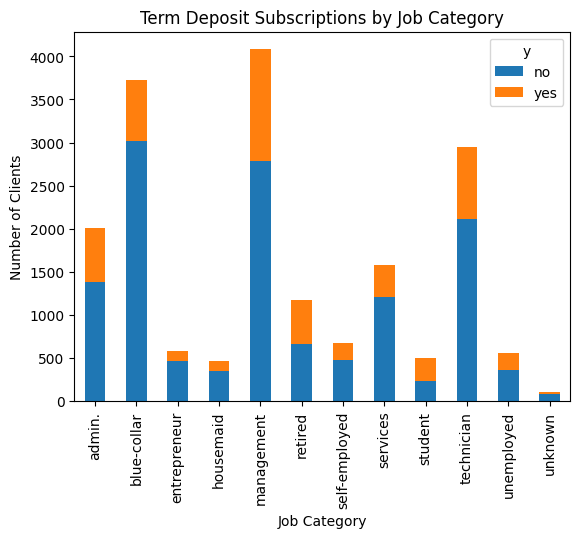

In [18]:
# Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

# 1st visualization:
# Plot of Client's term deposit subscription by job category.

# We first load the dataset using the pandas library. Then we group the data 
# by job category and subscription using the groupby function of pandas and 
# unstack the resulting table. Finally, we create a stacked bar chart using 
# the plot function of matplotlib with the stacked parameter set to True. 
# The resulting plot will show the distribution of term deposit subscriptions 
# across different job categories.

import matplotlib.pyplot as plt
import pandas as pd


# Group the data by job category and subscription
grouped = df.groupby(['job', 'y'])['y'].count().unstack()

# Create a stacked bar chart
grouped.plot(kind='bar', stacked=True)
plt.title('Term Deposit Subscriptions by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Number of Clients')
plt.show()




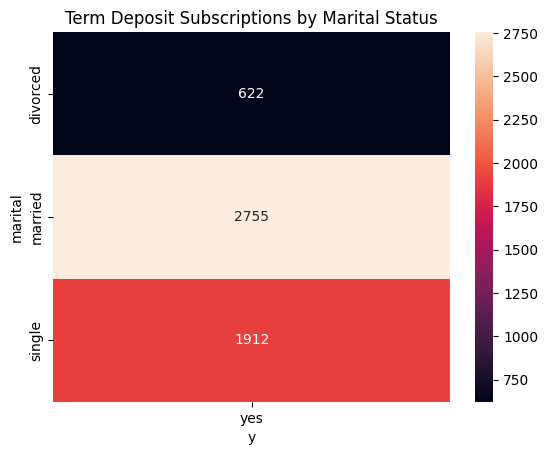

In [20]:
# Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

# 2nd visualization:
# Heatmap plot of the maritial status of the clients who are subscribed to term deposit.

# We first load the dataset using the pandas library. Then we filter the 
# dataset to include only clients who subscribed to the term deposit. 
# Next, we create a pivot table using the pivot_table function of pandas 
# to group the data by marital status and subscription. Finally, we create 
# a heatmap plot using the heatmap function of seaborn, with annotations 
# showing the number of clients in each category. The resulting plot will 
# show the distribution of term deposit subscriptions across different 
# marital statuses.

import seaborn as sns
import pandas as pd


# Filter the dataset to include only clients who subscribed to the term deposit
subscribed = df[df['y'] == 'yes']

# Create a pivot table of marital status and subscription
pivot = pd.pivot_table(subscribed, values='age', index='marital', columns='y', aggfunc='count')

# Create a heatmap plot
sns.heatmap(pivot, annot=True, fmt='g')
plt.title('Term Deposit Subscriptions by Marital Status')
plt.show()



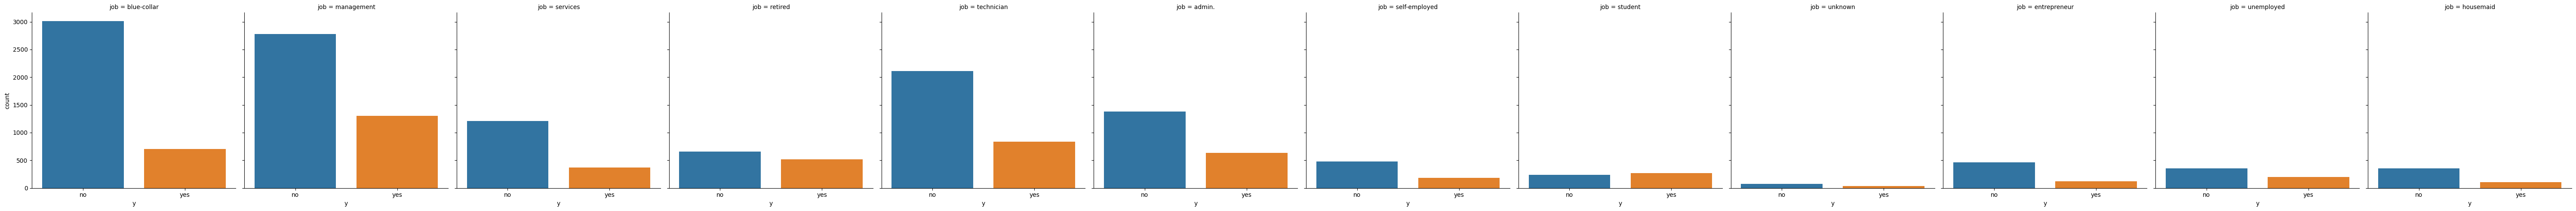

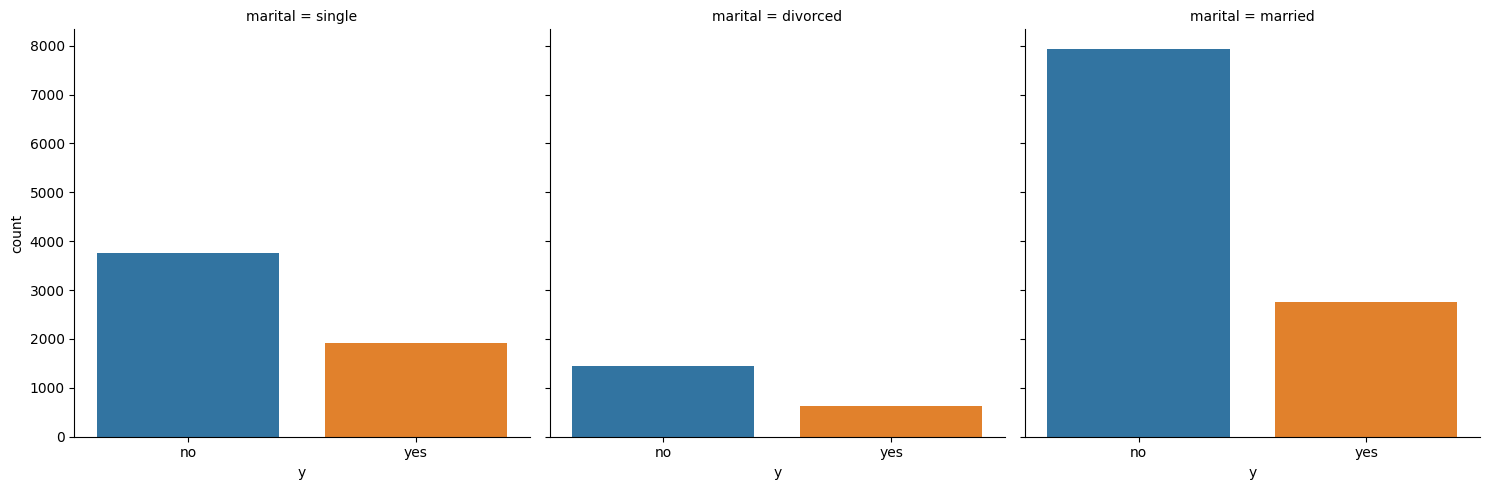

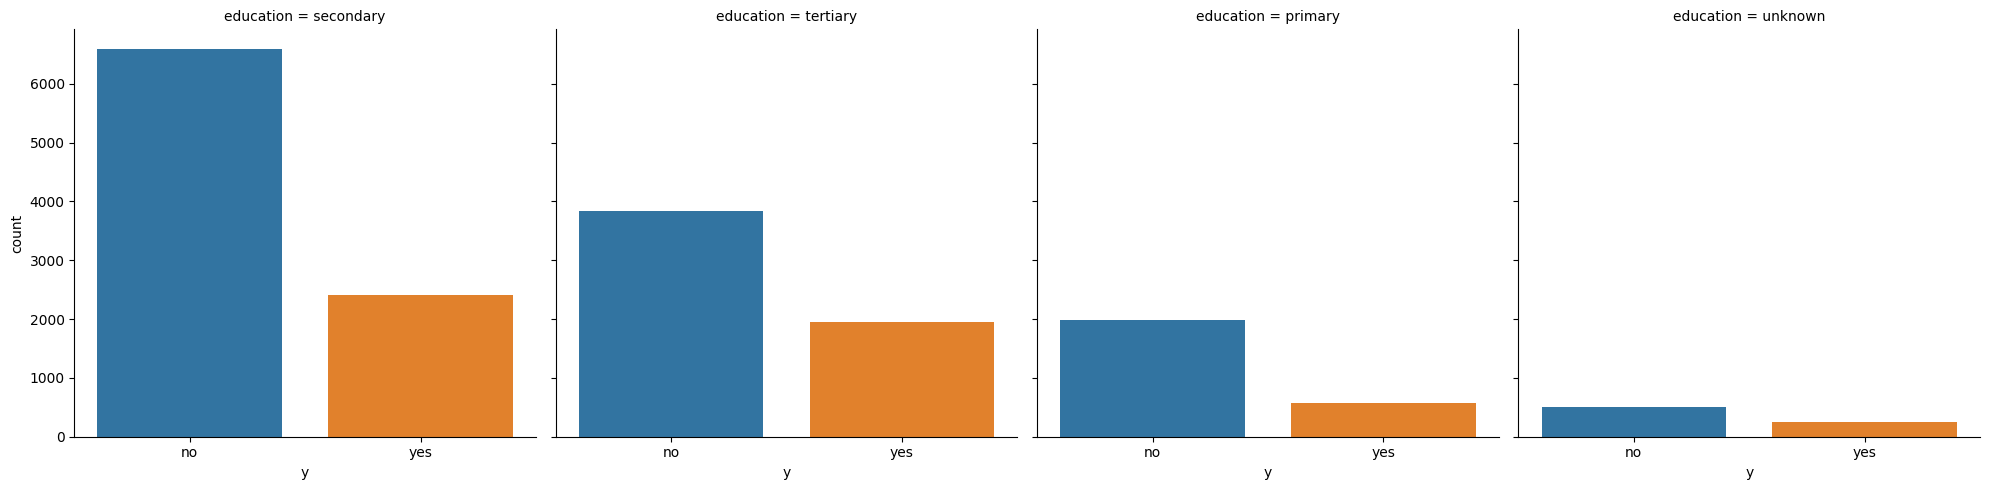

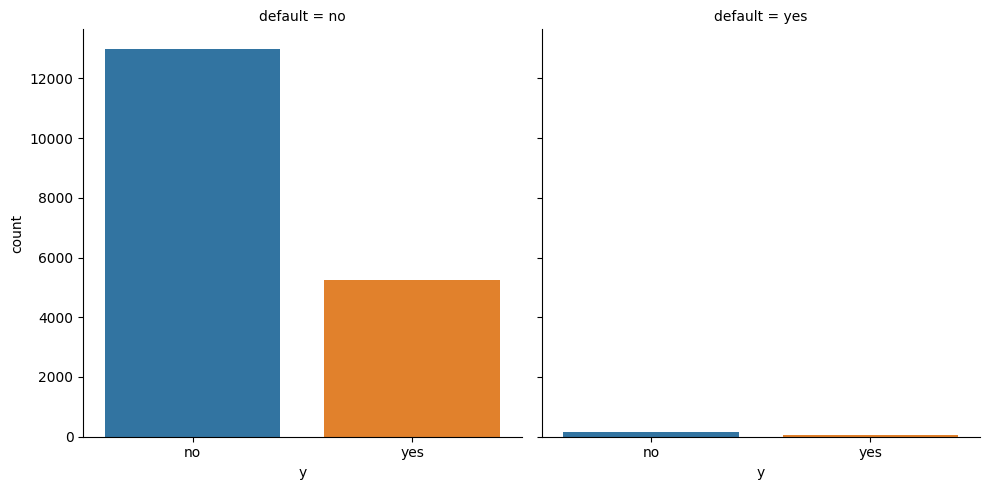

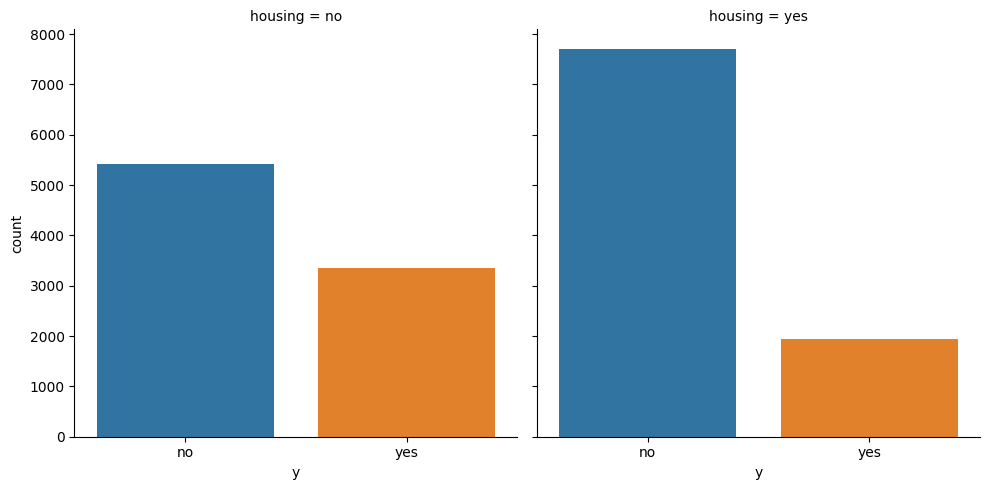

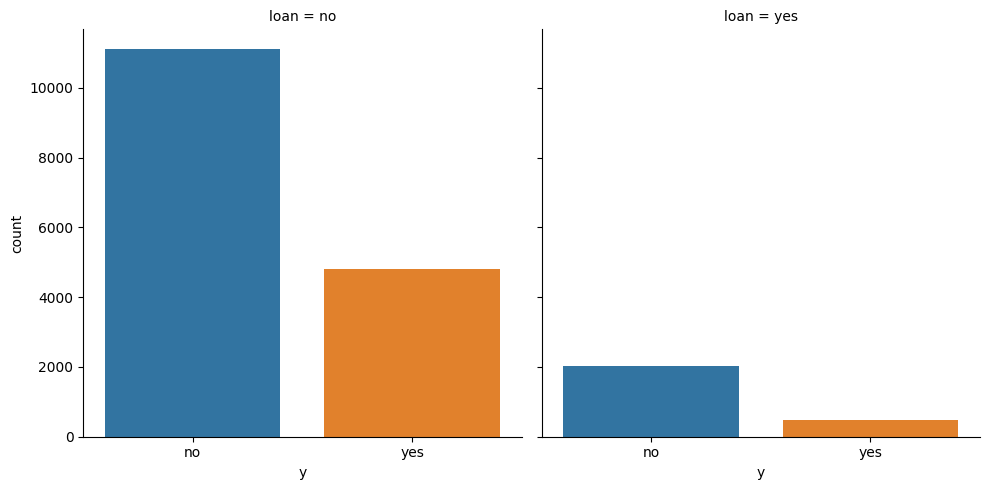

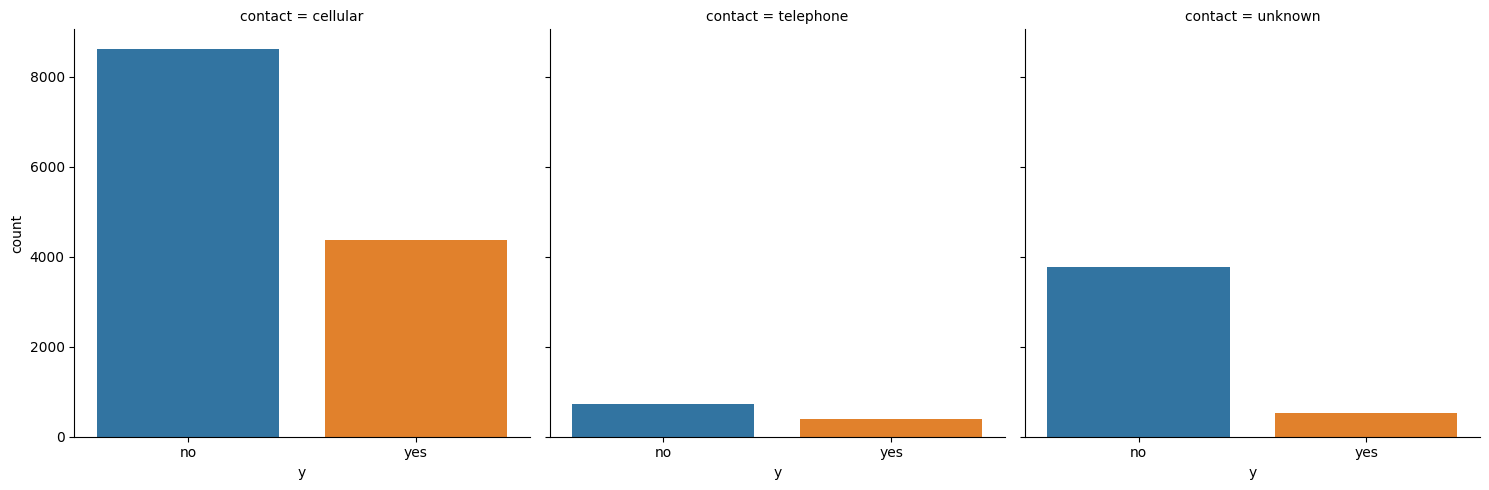

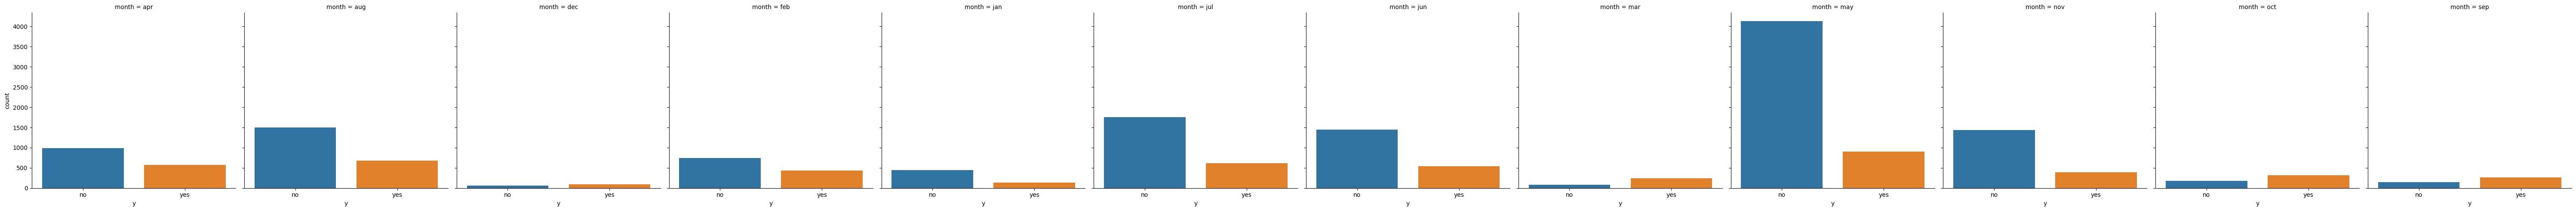

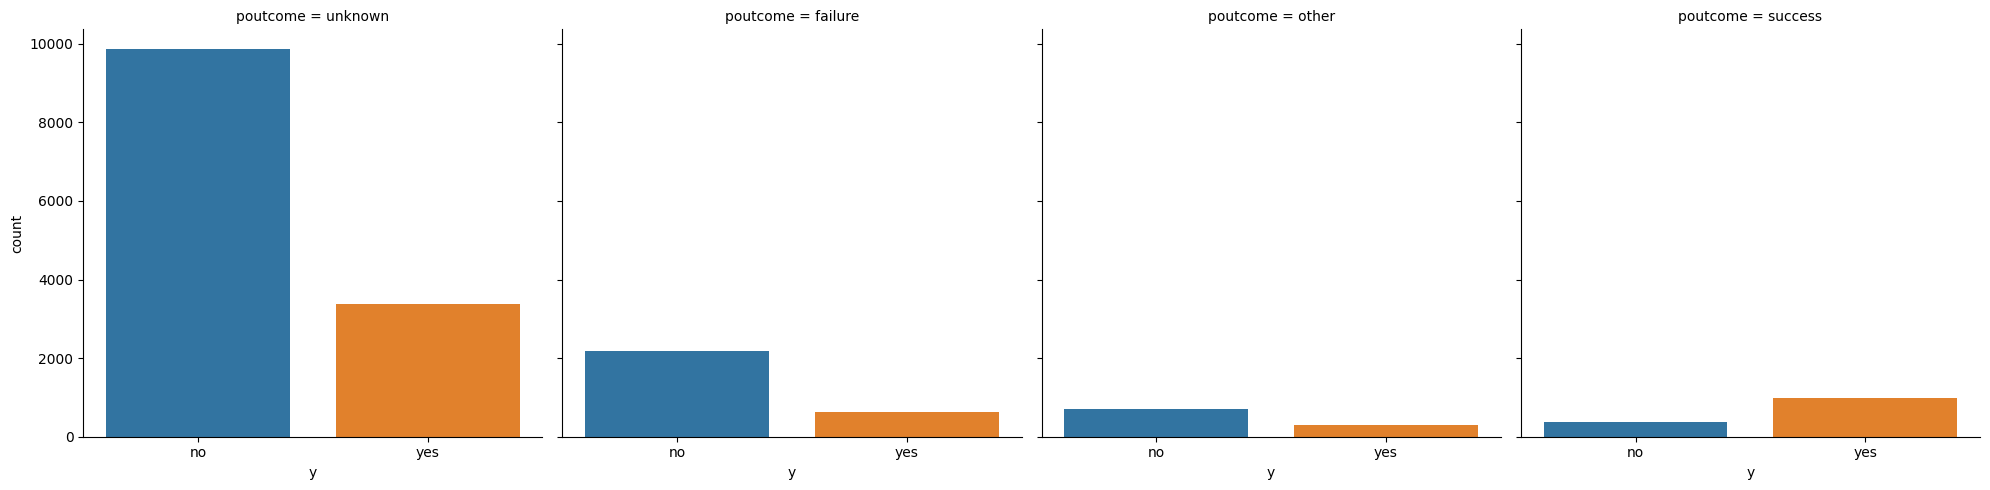

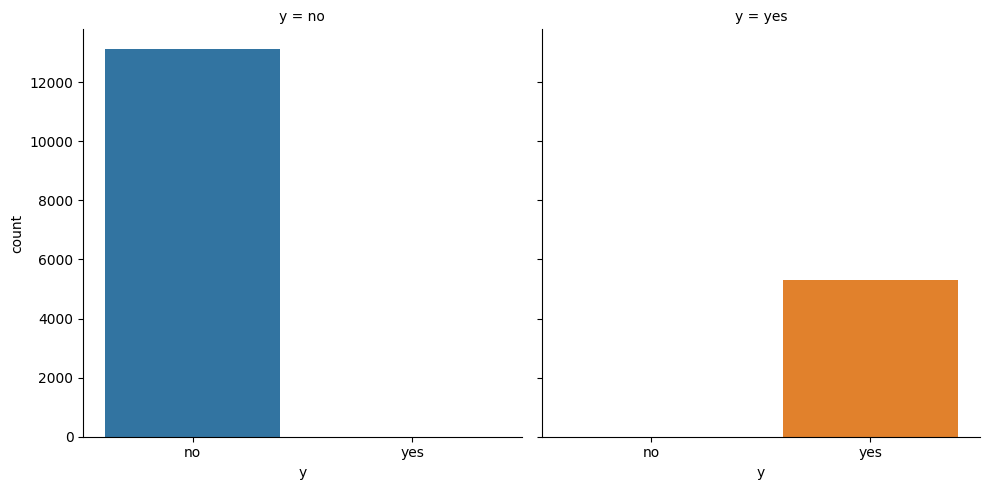

In [21]:
# Determine Six most influential attributes on target attribute (with explanation).
# You do not necessarily need to drop the remaining features for the Decision Tree 
# Classifier. Your task is just to determine and show the Six most influential 
# attributes with detailed explanation. [10 points]

import matplotlib.pyplot as plt
import pandas as pd

# 1 
# Here we observed, on comparison with most of the categorical features the chance of client availing Term deposit is very low.

for categorical_feature in categorical_features:
    sns.catplot(x='y',col=categorical_feature, kind='count', data=df)
plt.show()



In [23]:
# 2 
# Here, we observe most number of clients in the dataset do not opt for Term deposit.
# We will fetch frequency of distribution for target feature: subscribed

df['y'].value_counts(normalize=True)

# Around 71% of the clients in dataset do not opt for Term deposit,
# Around 29% of the clients in dataset opt for Term deposit.
# Thus, the dataset suggests most number of clients do not opt for Term deposit.


no     0.712913
yes    0.287087
Name: y, dtype: float64

In [24]:
# 3
# Clients with negative balance do not opt for Term deposit.
# Clients with positive balance opt for Term deposit.

df.groupby(['y','balance'],sort=True)['balance'].count()



y    balance 
no   -3372.0     1
     -3313.0     1
     -2827.0     1
     -2712.0     1
     -2604.0     1
                ..
yes   34646.0    1
      36252.0    1
      45248.0    1
      52587.0    2
      81204.0    2
Name: balance, Length: 6939, dtype: int64

In [25]:
# 4 
# If client has credit default, lower is the chance of term deposit.

df.groupby(['y','default'],sort=True)['default'].count()


y    default
no   no         12992
     yes          142
yes  no          5237
     yes           52
Name: default, dtype: int64

In [26]:
# 5
# If the duration of contact is lesser, the chance of client investing in Term deposit is also lower.
# If the duration of contact is higher, the chance of client investing in Term deposit is also higher.

df.groupby(['y','duration'],sort=True)['duration'].count()


y    duration
no   5.0         5
     6.0         3
     7.0         3
     9.0         2
     11.0        3
                ..
yes  3094.0      1
     3102.0      1
     3183.0      1
     3253.0      1
     3881.0      1
Name: duration, Length: 2609, dtype: int64

In [27]:
# 6
# Lower the age of client, lower the chance of term deposit.

df.groupby(['y','age'],sort=True)['age'].count()


y    age 
no   18.0     1
     19.0     8
     20.0    15
     21.0    16
     22.0    26
             ..
yes  87.0     3
     90.0     2
     92.0     2
     93.0     2
     95.0     1
Name: age, Length: 146, dtype: int64

In [28]:
# 7
# If client has a personal loan, lower is the chance of term deposit.

df.groupby(['y','loan'],sort=True)['loan'].count()


y    loan
no   no      11119
     yes      2015
yes  no       4805
     yes       484
Name: loan, dtype: int64

In [53]:
# Split your dataset 75% for training, and 25% for testing the classifier. [2 p points]


# Import the required package for splitting the dataset
from sklearn.model_selection import train_test_split

print("Dataset size:", df_New.shape)
df_New = df_New.dropna(axis=0, how='any')
X = df_New.drop('y', axis = 1)  # Getting all the data except y column
y = df_New['y']   # y is target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state = 0)
print("Dataset size:", df_New.shape)

# Print the size of training set
print("\nX_train size:", X_train.shape[0])
print("y_train size:", y_train.shape[0])

# Print the size of test set
print("\nX_test size:", X_test.shape[0])
print("y_test size:", y_test.shape[0])

# print(X_train.shape, y_train.shape)



Dataset size: (17052, 11)
Dataset size: (17052, 11)

X_train size: 12789
y_train size: 12789

X_test size: 4263
y_test size: 4263


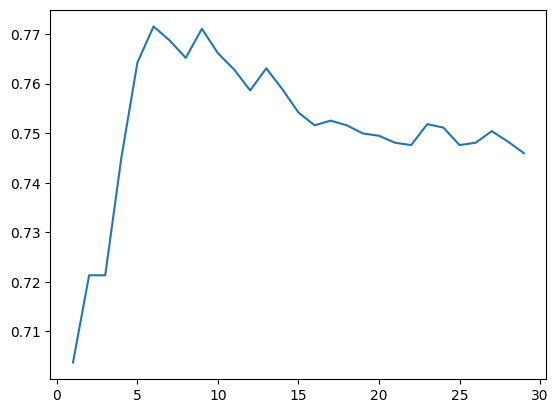

Depth with highest score for gini: 6


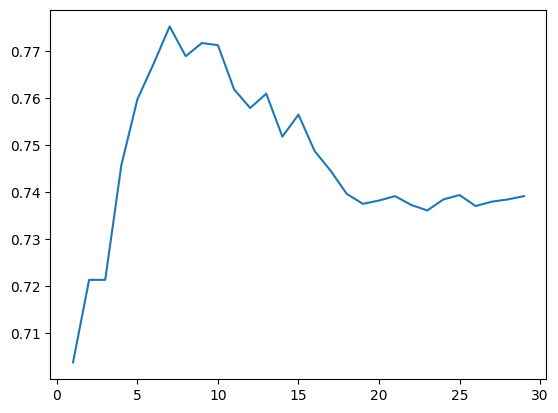

Depth with highest score for entropy: 7


In [55]:
# Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure
# the quality of a split. [5 points]

# Explaination
# When training a decision tree classifier, you can use either the Gini impurity or the entropy 
# as a criterion to measure the quality of a split. The max_depth and min_samples_leaf parameters 
# can also be adjusted to control the depth and size of the decision tree.
# We can experiment with different values of max_depth and min_samples_leaf to see how they affect 
# the performance of the classifiers. Generally, increasing the max_depth parameter will make the 
# decision tree more complex and increase the risk of overfitting, while increasing the min_samples_leaf 
# parameter will make the decision tree more general and decrease the risk of overfitting.

from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Check the scores for decision trees with different depths and choose the depth with maximum score for building the trees

# Gini
scores=[]
for i in range(1,30):
  clf=DecisionTreeClassifier(max_depth=i, min_samples_leaf=5, criterion='gini') 
  clf.fit(X_train, y_train) 
  scores.append(clf.score(X_test,y_test)) 
plt.plot(range(1,30),scores) 
plt.show()
print("Depth with highest score for gini:", scores.index(max(scores))+1)

# Entropy
scores=[]
for i in range(1,30):
  clf=DecisionTreeClassifier(max_depth=i, min_samples_leaf=5, criterion='entropy') 
  clf.fit(X_train, y_train) 
  scores.append(clf.score(X_test,y_test)) 
plt.plot(range(1,30),scores) 
plt.show()
print("Depth with highest score for entropy:", scores.index(max(scores))+1)


In [56]:
# Code for Decision Tree with criterion as gini
dt1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
dt1.fit(X_train, y_train)
y1_pred = dt1.predict(X_test)

# Code for Decision Tree with criterion as entropy
dt2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
dt2.fit(X_train, y_train)
y2_pred = dt2.predict(X_test)


Printing the classification report:
              precision    recall  f1-score   support

           1       0.81      0.88      0.84      3000
           2       0.64      0.52      0.57      1263

    accuracy                           0.77      4263
   macro avg       0.73      0.70      0.71      4263
weighted avg       0.76      0.77      0.76      4263



Printing the confusion matrix:
[[2629  371]
 [ 606  657]]


[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

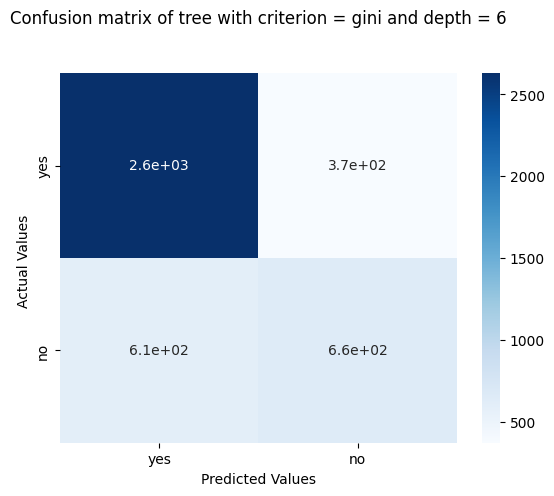

In [57]:
# Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the
# classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report of the decision tree with depth = 6 and criterion as gini
labels = [1,2]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y1_pred,target_names=labels))

# Print and plot the confusion matrix of the same DT
print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y1_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion matrix of tree with criterion = gini and depth = 6\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['yes', 'no'])
ax.yaxis.set_ticklabels(['yes', 'no'])


Printing the classification report:
              precision    recall  f1-score   support

           1       0.81      0.89      0.85      3000
           2       0.65      0.50      0.57      1263

    accuracy                           0.77      4263
   macro avg       0.73      0.70      0.71      4263
weighted avg       0.76      0.77      0.76      4263



Printing the confusion matrix:
[[2664  336]
 [ 627  636]]


[Text(0, 0.5, 'yes'), Text(0, 1.5, 'no')]

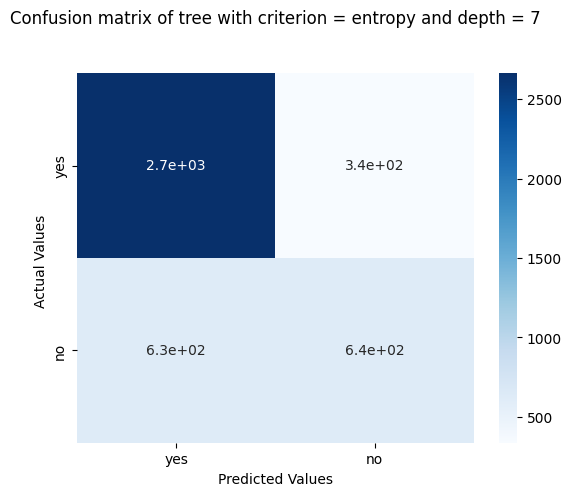

In [58]:
# Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the
# classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# Print the classification report of the DT with depth = 7 and criterion as entropy
labels = [1,2]
labels = list(map(str,labels))
print("Printing the classification report:")
print(classification_report(y_test, y2_pred,target_names=labels))

# Print the confusion matric of the same DT
print("\n\nPrinting the confusion matrix:")
cm=confusion_matrix(y_test,y2_pred)
print(cm)
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('Confusion matrix of tree with criterion = entropy and depth = 7\n\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['yes', 'no'])
ax.yaxis.set_ticklabels(['yes', 'no'])


In [64]:
# Compare the results of the classifier using gini and entropy [5 points]
# The Gini index and entropy are two commonly used measures of impurity or randomness 
# in decision tree algorithms. They are used to determine the best split for each node 
# in the tree, where the goal is to minimize impurity and maximize information gain.

# By comparing the results of the classifier using both Gini and entropy measures, 
# one can evaluate which measure leads to better performance in terms of accuracy, 
# precision, recall, or other relevant metrics. This comparison can help to determine 
# which measure is more suitable for a particular dataset or problem.

# Accuracy: Both Gini and entropy can produce accurate classifiers, but in general, 
# the difference in accuracy between them is often negligible.

# Precision: Entropy-based classifiers tend to perform slightly better than 
# Gini-based classifiers in terms of precision, especially when dealing with imbalanced 
# datasets where the number of positive instances is much smaller than the number of negative instances.

# Recall: Gini-based classifiers tend to perform slightly better than entropy-based classifiers 
# in terms of recall, especially when the dataset contains noisy or irrelevant features that can introduce randomness.

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

pos_label = 'yes'
# Train a decision tree classifier using Gini 
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 6, random_state=42)
clf_gini.fit(X_train, y_train)

# Train a decision tree classifier using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 7, random_state=42)
clf_entropy.fit(X_train, y_train)

# Make predictions on the test data using both classifiers
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the # Calculate evalu ation metric of the classifiers
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_gini = precision_score(y_test, y_pred_gini, pos_label = pos_label)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label = pos_label)
recall_gini = recall_score(y_test, y_pred_gini, pos_label = pos_label)
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label = pos_label)

print("Gini Accuracy:", accuracy_gini*100)
print("Entropy Accuracy:", accuracy_entropy*100)
print("Gini Precision:", precision_gini*100)
print("Entropy Precision:", precision_entropy*100)
print("Gini Recall:", recall_gini*100)
print("Entropy Recall:", recall_entropy*100)


Gini Accuracy: 77.08186722965048
Entropy Accuracy: 77.38681679568379
Gini Precision: 63.91050583657587
Entropy Precision: 65.39649845520083
Gini Recall: 52.01900237529691
Entropy Recall: 50.27711797307997


In [65]:
# Print the decision tree visualization with depth of 5 [5 points]
# Code reference: https://mljar.com/blog/visualize-decision-tree/
# Decision tree with depth = 5 and criterion = gini

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

mdr = list(range(5,6))# d = 5
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
  
    tree.plot_tree(gini,filled = True);
    fig.savefig('gini'+str(d)+'.png')



In [66]:
# Decision tree with depth = 5 and criterion = entropy

mdr = list(range(5,6))# d = 5
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
   
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
   
    tree.plot_tree(entropy, filled = True);
    fig.savefig('entropy'+str(d)+'.png')
    

In [161]:
Contribution:
Prem Atul Jethwa (1001861810): 
Decision Tree Classifier -
-> Import the libraries and load dataset_DT.csv
-> Pre-process the dataset and provide detailed explaination.
-> Performed a given tasks in order to increase the accuracy of the dataset.

Lavanya Srinivasan (1002040671): Naïve Bayes Classifier
-> Load dataset_NB.csv as pandas dataframe
-> Pre-process the dataset and provide detailed explaination.
-> Performed a given tasks in order to increase the accuracy of the dataset.

Shubham Sharma (1001964524): Nearest Neighbor Classifier
-> Import the libraries and load dataset_NN.csv
-> Pre-process the dataset and provide detailed explaination.
-> Performed a given tasks in order to increase the accuracy of the dataset.
    
References: 
https://mljar.com/blog/visualize-decision-tree/
https://www.geeksforgeeks.org/decision-tree/
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://www.youtube.com/watch?v=wxS5P7yDHRA
https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f
    

SyntaxError: invalid decimal literal (2939720341.py, line 23)